In [1]:
import mcmc
import pymc3 as pm
import theano.tensor as tt
from exoplanet.gp import terms, GP
import numpy as np
import utils
import exoplanet as xo
import matplotlib.pyplot as pl
import corner
%matplotlib inline

red = '#FE4365'
blue = '#00A9FF'
yellow = '#ECA25C'
green = '#3F9778'
darkblue = '#005D7F'

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', fontsize=20)
pl.rc('lines', linewidth=4)

t = np.linspace(-5, 5, 3000)
tparams = [0.0, 0.1, 0.5, 0.05]  # t0, r, d, tin

alpha = -13 # total variance 
x = np.linspace(-3, 3, 20)
logr = np.log(10 ** x)
logsig = 0.5 * (alpha - np.log(1 + np.exp(2*logr)))
logs0 = logr + logsig
logq = np.log(1/np.sqrt(2))
diag = np.exp(2*logsig)
a = [1, 2]

w0T = 1.0
logw0 = np.log(w0T) - np.log(tparams[2])
logs0 = 2 * logs0  - logw0

unc1d = np.zeros((4, len(logr)))
unc2d = np.zeros((4, len(logr)))

#for i, (ls0, lsig) in enumerate(zip(logs0, logsig)):
#    y2d, y1d = mcmc.make_data(t, ls0 + 2*np.log(np.mean(a)), logw0, 
#                              logq, lsig, 
#                              tparams[0], tparams[1], 
#                              tparams[2], tparams[3], a[1])
#    trace2d = mcmc.run_mcmc_2d(t, y2d, ls0, logw0, 
#                               logq, lsig + 0.5*np.log(2), 
#                               tparams[0], tparams[1], tparams[2], 
#                               tparams[3], a[1])
#    trace1d = mcmc.run_mcmc_1d(t, y1d, ls0 + 2*np.log(np.mean(a)), 
#                               logw0, logq, lsig, 
#                               tparams[0], tparams[1], tparams[2], 
#                               tparams[3])
#    
#    pm.save_trace(trace1d, directory="traces{0}_tmp/trace1d_{1}".format(w0T, i), overwrite=True)
#    pm.save_trace(trace2d, directory="traces{0}_tmp/trace2d_{1}".format(w0T, i), overwrite=True)
#    
#    unc1d[0, i] = np.std(trace1d.get_values('t0'))
#    unc1d[1, i] = np.std(trace1d.get_values('r'))
#    unc1d[2, i] = np.std(trace1d.get_values('d'))
#    unc1d[3, i] = np.std(trace1d.get_values('tin'))
#    
#    unc2d[0, i] = np.std(trace2d.get_values('t0'))
#    unc2d[1, i] = np.std(trace2d.get_values('r'))
#    unc2d[2, i] = np.std(trace2d.get_values('d'))
#    unc2d[3, i] = np.std(trace2d.get_values('tin'))

In [2]:
y2d, y1d = mcmc.make_data(t, logs0[0] + 2*np.log(np.mean(a)), logw0, 
                              logq, logsig[0], 
                              tparams[0], tparams[1], 
                              tparams[2], tparams[3], a[1])
m1, m2 = mcmc.load_models(t, y1d, y2d, logs0[0], logw0, 
                              logq, logsig[0], 
                              tparams[0], tparams[1], 
                              tparams[2], tparams[3], a[1])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
  


In [ ]:
logr = np.log(10 ** x)
logsig = 0.5 * (alpha - np.log(1 + np.exp(2*logr)))
logs0 = logr + logsig
logq = np.log(1/np.sqrt(2))
diag = np.exp(2*logsig)
a = [1, 2]
    
w0T = 10.0
logw0 = np.log(w0T) - np.log(tparams[2])
logs0 = 2 * logs0  - logw0

unc1d = np.zeros((4, len(logr)))
unc2d = np.zeros((4, len(logr)))

for i, (ls0, lsig) in enumerate(zip(logs0, logsig)):
    y2d, y1d = mcmc.make_data(t, ls0, logw0, 
                              logq, lsig, 
                              tparams[0], tparams[1], 
                              tparams[2], tparams[3], a[1])
    trace2d = mcmc.run_mcmc_2d(t, y2d, ls0, logw0, 
                               logq, lsig + 0.5*np.log(2), 
                               tparams[0], tparams[1], tparams[2], 
                               tparams[3], a[1])
    trace1d = mcmc.run_mcmc_1d(t, y1d, ls0 + np.log(np.mean(a)), 
                               logw0, logq, lsig, 
                               tparams[0], tparams[1], tparams[2], 
                               tparams[3])
    
    pm.save_trace(trace1d, directory="traces{0}/trace1d_{1}".format(w0T, i), overwrite=True)
    pm.save_trace(trace2d, directory="traces{0}/trace2d_{1}".format(w0T, i), overwrite=True)
    
    unc1d[0, i] = np.std(trace1d.get_values('t0'))
    unc1d[1, i] = np.std(trace1d.get_values('r'))
    unc1d[2, i] = np.std(trace1d.get_values('d'))
    unc1d[3, i] = np.std(trace1d.get_values('tin'))
    
    unc2d[0, i] = np.std(trace2d.get_values('t0'))
    unc2d[1, i] = np.std(trace2d.get_values('r'))
    unc2d[2, i] = np.std(trace2d.get_values('d'))
    unc2d[3, i] = np.std(trace2d.get_values('tin'))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.


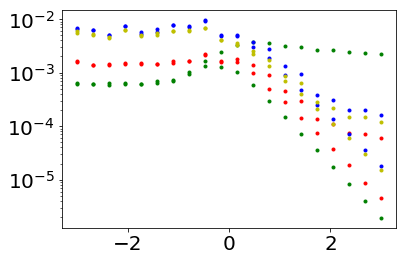

In [3]:
import mcmc
import pymc3 as pm
import theano.tensor as tt
from exoplanet.gp import terms, GP
import numpy as np
import utils
import exoplanet as xo
import matplotlib.pyplot as pl
import corner
%matplotlib inline

t = np.linspace(-5, 5, 3000)
tparams = [0.0, 0.1, 0.5, 0.05]  # t0, r, d, tin

alpha = -13 # total variance 
x = np.linspace(-3, 3, 20)
logr = np.log(10 ** x)
logsig = 0.5 * (alpha - np.log(1 + np.exp(2*logr)))
logs0 = logr + logsig
logq = np.log(1/np.sqrt(2))
diag = np.exp(2*logsig)
a = [1, 2]

w0T = 1.0
logw0 = np.log(w0T) - np.log(tparams[2])
logs0 = 2 * logs0  - logw0

y2d, y1d = mcmc.make_data(t, logs0[0], logw0, 
                              logq, logsig[0], 
                              tparams[0], tparams[1], 
                              tparams[2], tparams[3], a[1])

m1, m2 = mcmc.load_models(t, y1d, y2d, logs0[0], logw0, 
                              logq, logsig[0], 
                              tparams[0], tparams[1], 
                              tparams[2], tparams[3], a[1])

logr = np.linspace(-3, 3, 20)
unc1d = np.zeros((4, len(logr)))
unc2d = np.zeros((4, len(logr)))

for i in range(len(logr)):
    with m1, m2:
        trace1d = pm.load_trace('traces10_tmp/trace1d_{0}'.format(i))
        trace2d = pm.load_trace('traces10_tmp/trace2d_{0}'.format(i))

    unc1d[0, i] = np.std(trace1d.get_values('t0'))
    unc1d[1, i] = np.std(trace1d.get_values('r'))
    unc1d[2, i] = np.std(trace1d.get_values('d'))
    unc1d[3, i] = np.std(trace1d.get_values('tin'))
    
    unc2d[0, i] = np.std(trace2d.get_values('t0'))
    unc2d[1, i] = np.std(trace2d.get_values('r'))
    unc2d[2, i] = np.std(trace2d.get_values('d'))
    unc2d[3, i] = np.std(trace2d.get_values('tin'))

pl.semilogy(logr, unc2d[0,:], 'r.')
pl.semilogy(logr, unc1d[0,:], 'r.')

pl.semilogy(logr, unc2d[1,:], 'g.')
pl.semilogy(logr, unc1d[1,:], 'g.')

pl.semilogy(logr, unc2d[2,:], 'b.')
pl.semilogy(logr, unc1d[2,:], 'b.')

pl.plot(logr, unc2d[3,:], 'y.')
pl.plot(logr, unc1d[3,:], 'y.')

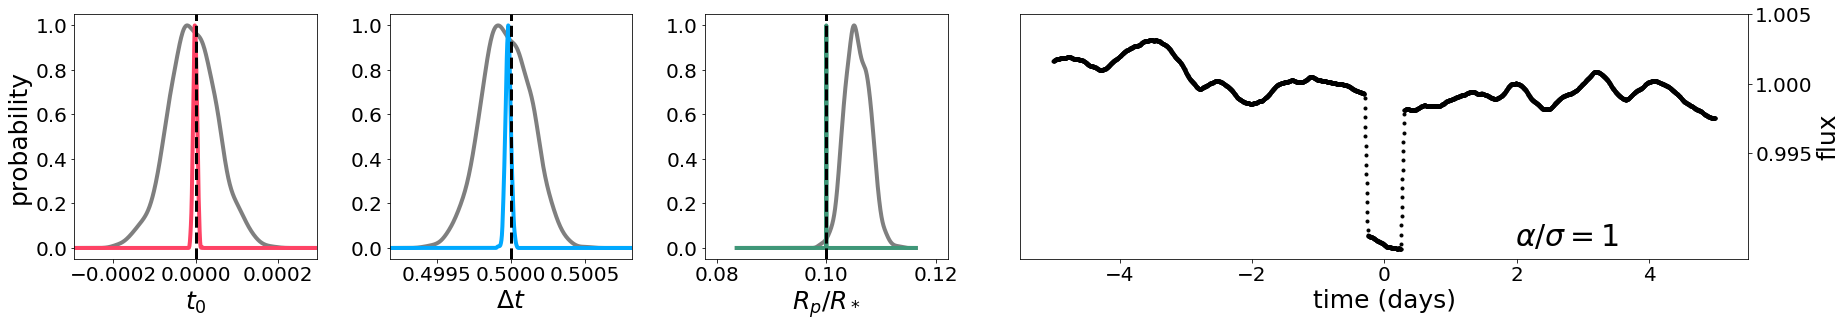

In [34]:
from scipy import stats 

red = '#FE4365'
blue = '#00A9FF'
yellow = '#ECA25C'
green = '#3F9778'
darkblue = '#005D7F'

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', fontsize=20)
pl.rc('lines', linewidth=4)

fig, ax = pl.subplots(1, 4, figsize=(30, 5), gridspec_kw={'width_ratios': [1, 1, 1, 3]})
fig.subplots_adjust(bottom=0.2)
[a.ticklabel_format(style='sci', axis='y', scilimits=(0,2)) for a in ax]

ax[0].set_ylabel("probability")

i = 19

y2d, y1d = mcmc.make_data(t, logs0[i], logw0, 
                              logq, logsig[i], 
                              tparams[0], tparams[1], 
                              tparams[2], tparams[3], a[1])

with m1, m2:
    trace1d = pm.load_trace('traces10_tmp/trace1d_{0}'.format(i))
    trace2d = pm.load_trace('traces10_tmp/trace2d_{0}'.format(i))

t01 = trace1d.get_values('t0')
t02 = trace2d.get_values('t0')
med, std = np.median(t01), np.std(t01)
true = 0.0
x = np.linspace(true - 5*std, true + 5*std, 500)
density1 = stats.gaussian_kde(t01)
density2 = stats.gaussian_kde(t02)
y1, y2 = density1(x), density2(x)
ax[0].plot(x, y1/np.max(y1), color='k', alpha=0.5)
ax[0].plot(x, y2/np.max(y2), color=red)
ax[0].axvline(0.0, linestyle='--', color='k', linewidth=3)
med, std = np.median(trace2d.get_values('t0')), np.std(trace1d.get_values('t0'))
ax[0].set_xlim(0.0 - 5*std, 0.0 + 5*std)
ax[0].set_xlabel(r"$t_0$")

d1 = trace1d.get_values('d')
d2 = trace2d.get_values('d')
density1 = stats.gaussian_kde(d1)
density2 = stats.gaussian_kde(d2)
med, std = np.median(d2), np.std(d1)
true = 0.5
x = np.linspace(true - 5*std, true + 5*std, 500)
y1, y2 = density1(x), density2(x)
ax[1].plot(x, y1/np.max(y1), color='k', alpha=0.5)
ax[1].plot(x, y2/np.max(y2), color=blue)
#ax[1].hist(trace1d.get_values('d'), normed=True, color='k', bins=15)
#ax[1].hist(trace2d.get_values('d'), normed=True, color=blue, alpha=0.8, bins=15)
ax[1].axvline(0.5, linestyle='--', color='k', linewidth=3)
med, std = np.median(trace2d.get_values('d')), np.std(trace1d.get_values('d'))
ax[1].set_xlim(0.5 - 5*std, 0.5 + 5*std)
ax[1].set_xlabel(r"$\Delta t$")

r1 = trace1d.get_values('r')
r2 = trace2d.get_values('r')
density1 = stats.gaussian_kde(r1)
density2 = stats.gaussian_kde(r2)
med, std = np.median(d2), np.std(d1)
true = 0.1
x = np.linspace(true - 100*std, true + 100*std, 5000)
y1, y2 = density1(x), density2(x)
ax[2].plot(x, y1/np.max(y1), color='k', alpha=0.5)
ax[2].plot(x, y2/np.max(y2), color=green)
#ax[2].hist(trace1d.get_values('r'), normed=True, color='k', bins=15)
#ax[2].hist(trace2d.get_values('r'), normed=True, color=blue, alpha=0.8, bins=15)
ax[2].axvline(0.1, linestyle='--', color='k', linewidth=3)
med, std = np.median(trace2d.get_values('r')), np.std(trace1d.get_values('r'))
ax[2].set_xlim(0.1 - 10*std, 0.1 + 10*std)
ax[2].set_xlabel(r"$R_p/R_*$")

ax[3].plot(t, y1d, '.', color='k')
#ax[1].get_yaxis().set_visible(False)
#ax[2].get_yaxis().set_visible(False)
#ax[0].get_shared_y_axes().join(ax[0], ax[1], ax[3])
#ax[0].set_yticks([50, 100, 150, 200])
ax[3].yaxis.tick_right()
ax[3].yaxis.set_label_position("right")
ax[3].set_ylabel('flux')
ax[3].set_xlabel('time (days)')
ax[3].set_yticks([0.995, 1.0, 1.005])
ax[3].annotate(r'$\alpha/\sigma = 1$', xy=(0.82, 0.25), xycoords='figure fraction', fontsize=30)

pl.savefig('plots/hist{0}.pdf'.format(i))

In [ ]:
pl.hist(trace2d.get_values('r'), alpha=0.5, normed=True)
pl.hist(trace1d.get_values('r'), alpha=0.5, normed=True)

In [ ]:
fish1 = np.loadtxt('data/fisher_oneband_1.0.txt')
fish2 = np.loadtxt('data/fisher_twoband_1.0.txt')
x = np.linspace(-3, 3, len(fish1[0]))

In [ ]:
logr = np.linspace(-3, 3, 20)

pl.semilogy(logr, unc2d[0,:], 'r.')
pl.semilogy(logr, unc1d[0,:], 'r.')
pl.semilogy(x, fish1[0], 'r')
pl.semilogy(x, fish2[0], 'r')

pl.semilogy(logr, unc2d[1,:], 'g.')
pl.semilogy(logr, unc1d[1,:], 'g.')
pl.semilogy(x, fish1[1], 'g')
pl.semilogy(x, fish2[1], 'g')

pl.semilogy(logr, unc2d[2,:], 'b.')
pl.semilogy(logr, unc1d[2,:], 'b.')
pl.semilogy(x, fish1[2], 'b')
pl.semilogy(x, fish2[2], 'b')

pl.semilogy(logr, unc2d[3,:], 'y.')
pl.semilogy(logr, unc1d[3,:], 'y.')
pl.semilogy(x, fish1[3], 'y')
pl.semilogy(x, fish2[3], 'y')

In [ ]:
red = '#FE4365'
blue = '#00A9FF'
yellow = '#ECA25C'
green = '#3F9778'
darkblue = '#005D7F'

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', fontsize=20)
pl.rc('lines', linewidth=4)

In [ ]:
pl.figure(figsize=(10, 7))
edgewidth=1.0
size=10
alpha1, alpha2, alpha3, alpha4 = 1.0, 1.0, 1.0, 1.0

pl.semilogy(x, fish1[0], color=red, alpha=alpha1)
pl.semilogy(x, fish2[0], color=red, alpha=alpha1)
pl.semilogy(logr, unc2d[0,:], 'o', color=red, markeredgewidth=edgewidth, 
            markeredgecolor='k', markersize=size, label=r"$t_0$", alpha=alpha1)
pl.semilogy(logr, unc1d[0,:], 'o', color=red, markeredgewidth=edgewidth, 
            markeredgecolor='k', markersize=size, alpha=alpha1)

pl.semilogy(x, fish1[1], color=green, alpha=alpha2)
pl.semilogy(x, fish2[1], color=green, alpha=alpha2)
pl.semilogy(logr, unc2d[1,:], 'o', color=green, markeredgewidth=edgewidth, 
            markeredgecolor='k', markersize=size, label=r"$R_p$", alpha=alpha2)
pl.semilogy(logr, unc1d[1,:], 'o', color=green, markeredgewidth=edgewidth, 
            markeredgecolor='k', markersize=size, alpha=alpha2)

pl.semilogy(x, fish1[2], color=blue, alpha=alpha3)
pl.semilogy(x, fish2[2], color=blue, alpha=alpha3)
pl.semilogy(logr, unc2d[2,:], 'o', color=blue, markeredgewidth=edgewidth, 
            markeredgecolor='k', markersize=size, label=r"$\Delta t$", alpha=alpha3)
pl.semilogy(logr, unc1d[2,:], 'o', color=blue, markeredgewidth=edgewidth, 
            markeredgecolor='k', markersize=size, alpha=alpha3)

pl.xlabel(r"$\log(\alpha/\sigma)$")
pl.ylabel("1-sigma uncertainty")

#pl.semilogy(logr, unc2d[3,:], 'o', color=yellow)
#pl.semilogy(logr, unc1d[3,:], 'o', color=yellow)
#pl.semilogy(x, fish1[3], color=yellow)
#pl.semilogy(x, fish2[3], color=yellow)

pl.legend()
pl.savefig("plots/fisher1.0.pdf")

In [ ]:
trace2d